<a href="https://colab.research.google.com/github/jaesung0804/jaesung0804/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%99%80_%ED%86%B5%EA%B3%84%EC%9D%BD%EA%B8%B0_HW1%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Data load
kaggle titanic dataset : https://www.kaggle.com/c/titanic/data

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
df_titanic = pd.read_csv('train.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(df_titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


PassengerId: 탑승자 데이터 일련번호     
Survived: 생존여부, 0 = 사망, 1 = 생존    
Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
Sex: 탑승자 성별   
Name: 탑승자 이름       
Age: 탑승자 나이         
SibSp: 같이 탑승한 형제, 자매 또는 배우자 인원 수    
Parch: 같이 탑승한 부모님 또는 자녀 인원 수   
Ticket: 티켓 번호           
Fare: 요금      
Cabin: 선실 번호      
Embarked: 탑승 항구, C = Cherbourg, Q = Queenstown, S = Southampton

## Data preprocessing

In [ ]:
from sklearn import preprocessing

In [ ]:
# Null 처리 함수
def fill_na(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('S', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

# 불필요한 칼럼 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df

# 내부함수 호출
def transform_features(df):
    df = fill_na(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

## Modeling 

사이킷런(Scikit-learn) 라이브러리 등을 이용하여 SVM(support vector machine) 모델을 구현하시오.

### Question 1
- 소문제1 : train_test_split 함수를 import 하시오.       
- 소문제2 : train_test_split 기법을 사용하여 df_titanic_X,df_titanic_y에서 validation set을 179개 확보하시오.           
(RandomState는 1로 설정하고, test_size는 0.2로 한다.)             
- 소문제3 : linear kernel을 이용해 svm 모델을 생성하고, 적합하시오.(c값은 default값을 사용한다.)        
- 소문제 4 :  for문을 이용해 파라미터 c를 튜닝하고, 최적의 파라미터 값 c를 구하시오.
(parameter값의 범위는 0.001,0.01,0.1,1,5,10,50,100로 설정한다.)       
- 소문제 5 :  for문을 이용해 찾은 최적의 파라미터 값을 바탕으로 최종 svm모델을 적합하고, 교차검증을 실시하시오. (cv값은 5로 설정하고, 교차검증 결과값은 cv_scores라는 값으로 저장해 출력한다.)

In [ ]:
# 소문제 1

### START CODE HERE ### (= 1 line of code)
from sklearn.model_selection import train_test_split
### END CODE HERE ###

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_titanic_y = df_titanic['Survived']
df_titanic_X = df_titanic.drop('Survived', axis=1)

df_titanic_X= transform_features(df_titanic_X)  # 전처리 적용

In [ ]:
scaler=MinMaxScaler()  
df_titanic_X=scaler.fit_transform(df_titanic_X)

In [ ]:
# 소문제 2

### START CODE HERE ### (= 1 line of code)
X_train, X_val, y_train, y_val = train_test_split(df_titanic_X, df_titanic_y, test_size = 0.2, random_state = 1)
### END CODE HERE ###

In [ ]:
X_val.shape

(179, 8)

In [ ]:
# 소문제 3

### START CODE HERE ### (= 2 line of code)
clf = SVC(kernel = "linear")
clf.fit(X_train, y_train)
### END CODE HERE ###

SVC(kernel='linear')

In [ ]:
# 소문제 4
# best_c를 선정하실 때 argmin을 사용하셔서 mse로 판단하는게 맞는거 같아서 이렇게 했습니다.
from sklearn.metrics import mean_squared_error
### START CODE HERE ### 
parameters = [0.001,0.01,0.1,1,5,10,50,100]
scores = []
for parameter in parameters:
  svc = SVC(kernel = "linear", C = parameter)
  model = svc.fit(X_train, y_train)
  y_pred = model.predict(X_train)
  scores.append(mean_squared_error(y_train, y_pred))
### END CODE HERE ###    

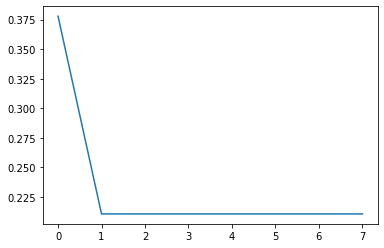

In [ ]:
plt.plot(scores)

In [ ]:
# 소문제 5

from sklearn.model_selection import cross_val_score

best_c = parameters[np.argmin(scores)]

### START CODE HERE ### 
svc = SVC(kernel = "linear", C = best_c)                                                   
model = svc.fit(X_train,y_train)
cv_scores = cross_val_score(model, df_titanic_X, df_titanic_y) 
### END CODE HERE ###

print("CV 점수 : " +str(cv_scores))
print("CV 평균점수 : " +str(cv_scores.mean()))

CV 점수 : [0.80446927 0.80337079 0.78651685 0.75280899 0.78651685]
CV 평균점수 : 0.7867365513778168


## Prediction

### Question 2

다음 과정을 통해 test set을 이용해 최종 결과를 확인하시오.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
X_test = pd.read_csv('test.csv')

X_test= transform_features(X_test)  # 전처리 적용
X_test=scaler.fit_transform(X_test) # scaling

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
X_test = pd.read_csv('test.csv')

In [ ]:
result = pd.DataFrame(
    {
        "PassengerId":X_test["PassengerId"], # 앞에서 PassendgerId 삭제했으므로 다시 불러 옴
        "Survived":y_pred
    }
)

In [ ]:
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
